Group Assignment2 Question 2: Introduction to AI and Data Science-Group 6:
   - Lubowa Lamech.
   - Smart Ronald.
   - Fred Okorio.
   - Cristian Timothy Waniaye.
   - Kirabo Calvin.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from scipy.stats.mstats import trimmed_var
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline

In [4]:
file_location = r"C:\Users\llubowa\Desktop\Datasets\cust_seg.csv"

In [1]:
# Wrangling the data
def wrangle(path):
    df = pd.read_csv(path)
    # Dropping high cardinality columns
    df.drop(columns=['Unnamed: 0','Customer Id'],inplace=True)
    # Selecting non defaulting customers
    mask = df['Defaulted']==0
    df =df[mask]
    df['Debts'] = df["Card Debt"] + df["Other Debt"]
    # Dropping low cardinality column 'Defaulted', 'Card Debt','Other Debt'
    df.drop(columns=['Defaulted','Card Debt','Other Debt'],inplace=True)

    return df



In [5]:
data = wrangle(file_location)
data.head()

,Age,Edu,Years Employed,Income,DebtIncomeRatio,Debts
0,41,2,6,19,6.3,1.197
1,47,1,26,100,12.8,12.800
3,29,2,4,19,6.3,1.197
4,47,1,31,253,7.2,18.216
6,38,2,4,56,1.6,0.896


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 849
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              517 non-null    int64  
 1   Edu              517 non-null    int64  
 2   Years Employed   517 non-null    int64  
 3   Income           517 non-null    int64  
 4   DebtIncomeRatio  517 non-null    float64
 5   Debts            517 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 28.3 KB


<AxesSubplot: xlabel='Income'>

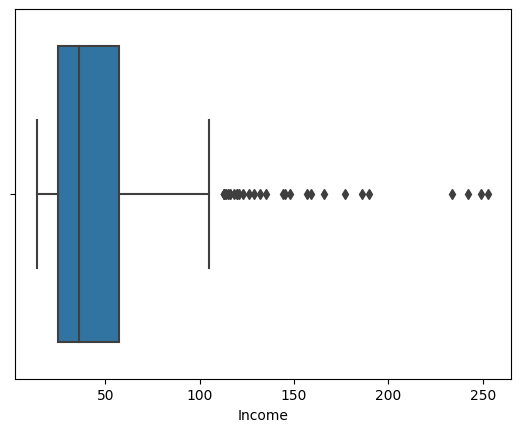

In [10]:
sns.boxplot(data=data,x='Income')

<AxesSubplot: xlabel='Income', ylabel='Count'>

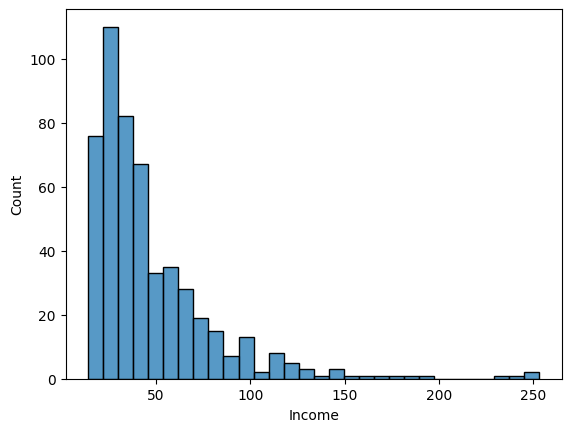

In [11]:
sns.histplot(data=data, x="Income")

In [16]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores =[]

In [17]:
for k in n_clusters:
    model = make_pipeline(StandardScaler(),KMeans(n_clusters=k, random_state=42))
    model.fit(data)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(data,model.named_steps["kmeans"].labels_))
                          

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [20]:
px.line(x=n_clusters,y=inertia_errors)

In [21]:
px.line(x=n_clusters,y=silhouette_scores)
#silhouette_scores

In [26]:
# final model
final_model = make_pipeline(StandardScaler(),KMeans(n_clusters=4, random_state=42))
final_model.fit(data)

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [27]:
labels = final_model.named_steps["kmeans"].labels_
labels[:5]

array([0, 1, 0, 1, 0])

In [28]:
xgb = data.groupby(labels).mean()
xgb

,Age,Edu,Years Employed,Income,DebtIncomeRatio,Debts
0,30.854701,1.303419,5.371795,27.602564,8.353419,2.259859
1,41.592593,1.765432,16.703704,88.123457,15.140741,11.344580
2,40.618705,1.395683,14.330935,59.115108,5.657554,3.129705
3,33.746032,3.428571,4.984127,40.714286,8.249206,3.095635


In [29]:
fig = px.bar(
    xgb,
    barmode='group',
    title="Mean values of customer financial status by cluster"

)
fig.update_layout(
    xaxis_title="Cluster"
)

fig.show()


Characteristics of Each Cluster:
   - Cluster 1: High income, high debt, stable financial positions.
   - Cluster 2: Moderate income, low debt, financially secure.
   - Cluster 0: Low income, high debt, financial vulnerability.
   - Cluster 3: Higher education, lower income, potentially financially unstable.


Key Insights:
   - Cluster 1: Consists of affluent individuals who can manage debts effectively due to substantial earnings.
   - Cluster 2: Represents financially secure individuals with capacity for responsible debt management.
   - Cluster 0: Individuals in this cluster are financially vulnerable and at a higher risk of default.
   - Cluster 3: Despite lower debt levels, individuals in this cluster may face financial instability due to lower incomes.


Recommendations
   - Cluster 1: Target with premium credit card offers emphasizing luxury rewards and benefits tailored to high-income individuals.
   - Cluster 2: Offer credit cards with competitive rates and cashback rewards, highlighting convenience and personalized rewards programs.
   - Cluster 0: Focus on educational campaigns for financial literacy and offer credit-building products with lower credit limits.
   - Cluster 3: Target with specialized student credit cards or entry-level products, providing incentives for responsible spending habits.


In [30]:
data['Cluster'] = labels

Text(0.5, 1.0, 'Number of Customers per Cluster')

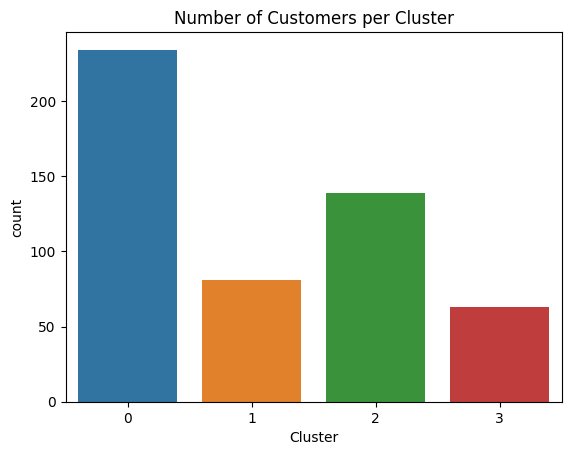

In [31]:
sns.countplot(
    data=data,
    x='Cluster'
)
plt.title('Number of Customers per Cluster')

Hierarchical Clustering

In [34]:
agg_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [35]:
cluster_assignment = agg_cluster.fit_predict(data)

c:\Users\llubowa\Desktop\New folder\Project\folder\Project\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [36]:
data_with_clusters = data.copy()
print(data_with_clusters.head())

   Age  Edu  Years Employed  Income  DebtIncomeRatio   Debts  Cluster
0   41    2               6      19              6.3   1.197        0
1   47    1              26     100             12.8  12.800        1
3   29    2               4      19              6.3   1.197        0
4   47    1              31     253              7.2  18.216        1
6   38    2               4      56              1.6   0.896        0


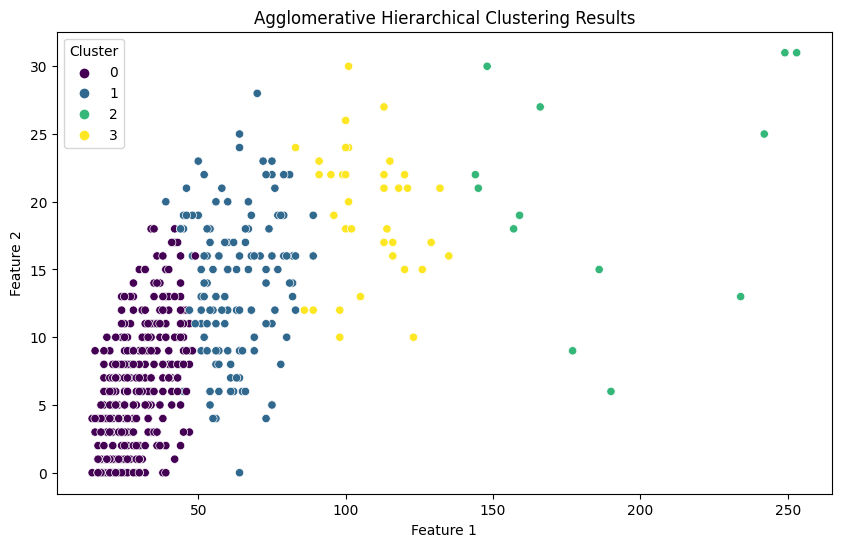

In [42]:
# Visualizing the clusters
# Add cluster assignments as a new column in your original dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_assignment

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Years Employed', hue='Cluster', data=data_with_clusters, palette='viridis', legend='full')
plt.title('Agglomerative Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Results')

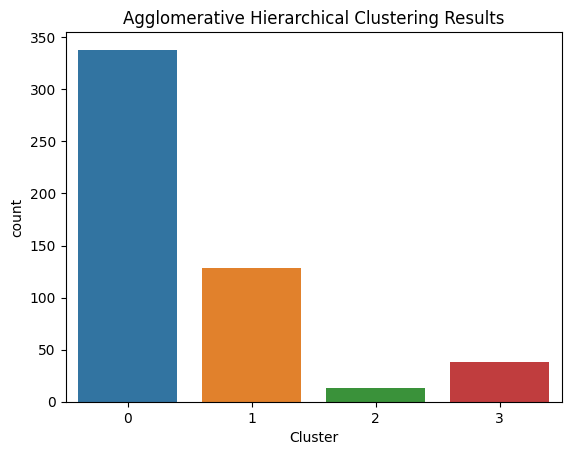

In [43]:
sns.countplot(
    data=data_with_clusters,
    x='Cluster'
)
plt.title('Agglomerative Hierarchical Clustering Results')

In [40]:
grouped = data_with_clusters.groupby('Cluster').mean()
grouped.head()

,Age,Edu,Years Employed,Income,DebtIncomeRatio,Debts
Cluster,,,,,,
0,32.781065,1.591716,6.328402,29.109467,8.473077,2.445491
1,39.500000,1.648438,13.906250,62.718750,9.415625,5.800727
2,45.461538,2.692308,20.538462,188.461538,7.230769,13.241615
3,43.000000,1.947368,19.210526,106.894737,8.528947,8.856895


In [41]:
fig = px.bar(
    grouped,
    barmode='group',
    title="Mean values of customer financial status by cluster"

)
fig.update_layout(
    xaxis_title="Cluster"
)

fig.show()

Description of Clusters
  - Cluster 2: High income, high debt, low debt to income ratio, financially secure.
   - Cluster 3: Moderate income, low debt, financially secure.
   - Cluster 0: Low income, low  debt but high debt to income ratio, financially vulnerable.
   - Cluster 1: Low debt with a high debt to income ratio, slightly higher income but less than that for cluster 3,.Financially unstable.
